In [4]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path

In [7]:
path = Path('/home/abhirup/Datasets/faces/')

landmarks_file = pd.read_csv(path / 'face_landmarks.csv')

In [9]:
landmarks_file.head()

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516


In [25]:
im = landmarks_file.values[0,:]
im_path = im[0]
points = im[1:]

In [36]:
points = points.reshape(-1,2)

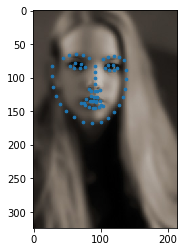

In [37]:
img = io.imread(path/im_path)
plt.imshow(img)
plt.scatter(points[:,0], points[:,1], s=7)

In [31]:
oh, ow = img.shape[:2]

In [42]:
def rescale(img, points, size):
    oh, ow = img.shape[:2]
    nh, nw = size
    img = transform.resize(img, (nh, nw))
    points = points * [nw/ow, nh/oh]
    return img, points

In [ ]:
im, p = rescale(img, points, (150, 150))

In [44]:
im.shape

(150, 150, 3)